In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [5]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-11 08:41:07.787470+05:30


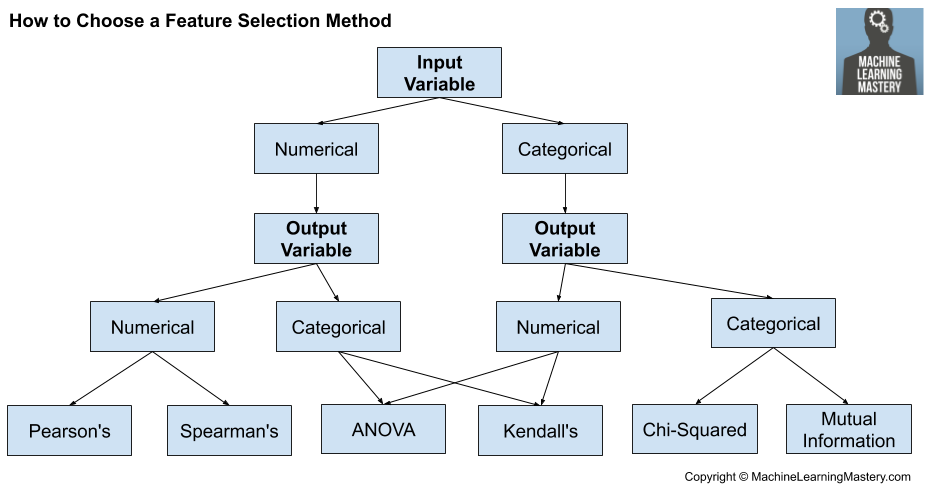

In [6]:
from IPython.display import Image
Image(filename='/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/Feature-Selection-Methods.png')

In [0]:
# Numerical Input, Numerical Output :- Pearson’s correlation coefficient ( f_regression()) , Spearman’s rank coefficient (nonlinear)
# Categorical Input, Numerical Output :- can use the same “Numerical Input, Categorical Output” methods in reverse order
# Numerical Input, Categorical Output  :- ANOVA correlation coefficient (f_classif()) , Kendall’s rank coefficient (nonlinear).
# Categorical Input, Categorical Output :- Chi-Squared test (contingency tables). , Mutual Information (mutual_info_classif() and mutual_info_regression())

In [8]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas
import matplotlib.pyplot as plt
%matplotlib inline
! pip install plotly_express
import plotly_express as px

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import os
os.chdir('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureEngineering/')

In [10]:
!ls

bond_ratings.csv  finalDf_pca.csv	fund_specs.csv	     return_3year.csv
data.csv	  fund_allocations.csv	other_specs.csv      return_5year.csv
data_joined.csv   fund_config.csv	primary_keys_df.csv
data_tst_ids.csv  fund_ratios.csv	return_10year.csv


In [0]:
## copying the files to feature selection folder
!cp data.csv  '/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/'
!cp data_joined.csv  '/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/'

In [0]:
os.chdir('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/')

In [13]:
!ls

best_columns.csv
data.csv
data_joined.csv
data_tst_ids.csv
df_ns_df_sorted_annova.csv
df_ns_df_sorted_chi2.csv
df_ns_df_sorted_FI.csv
Feature-Selection-Methods.png
finalDf_pca.csv
Hackathon_GreatLearning_Great_Stone_Rating_DeepNeural.h5
sample_submission.csv


In [0]:
data = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/data.csv")
data_joined = pd.read_csv("/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/data_joined.csv")

In [15]:
col_int = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data.drop(columns=['greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

958
col_int :-  954 | col_cat :- 0 | col_id :- 3 | col_tgt :- 1
Index([], dtype='object')


In [0]:
######################## *********************** DATA VISUALIZATION **********************#################################

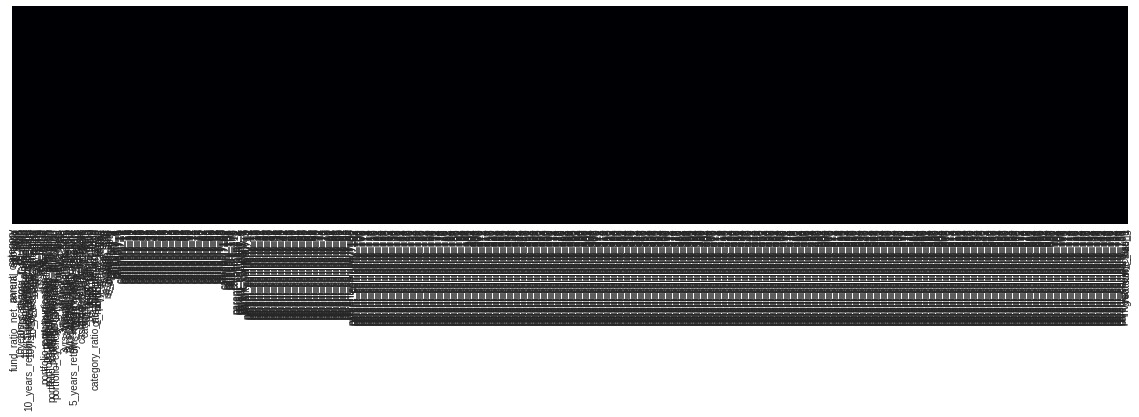

In [17]:
## finding the null and missing values in the database
plt.figure(figsize=(20,4))
plt.style.use(['seaborn-white'])
sns.heatmap(data[~data.greatstone_rating.isnull()].isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno')

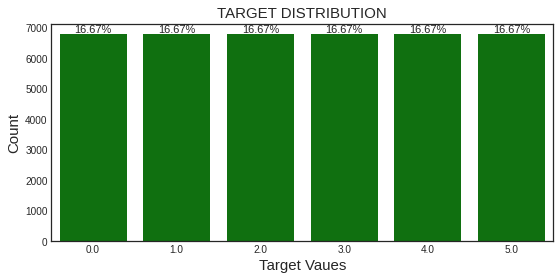

In [18]:
plt.subplots(1,1,figsize=(9,4)) 
plt.style.use('seaborn')
g = sns.countplot(x=data[~data.greatstone_rating.isnull()]['greatstone_rating'], data=data[~data.greatstone_rating.isnull()], color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 15)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data[~data.greatstone_rating.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

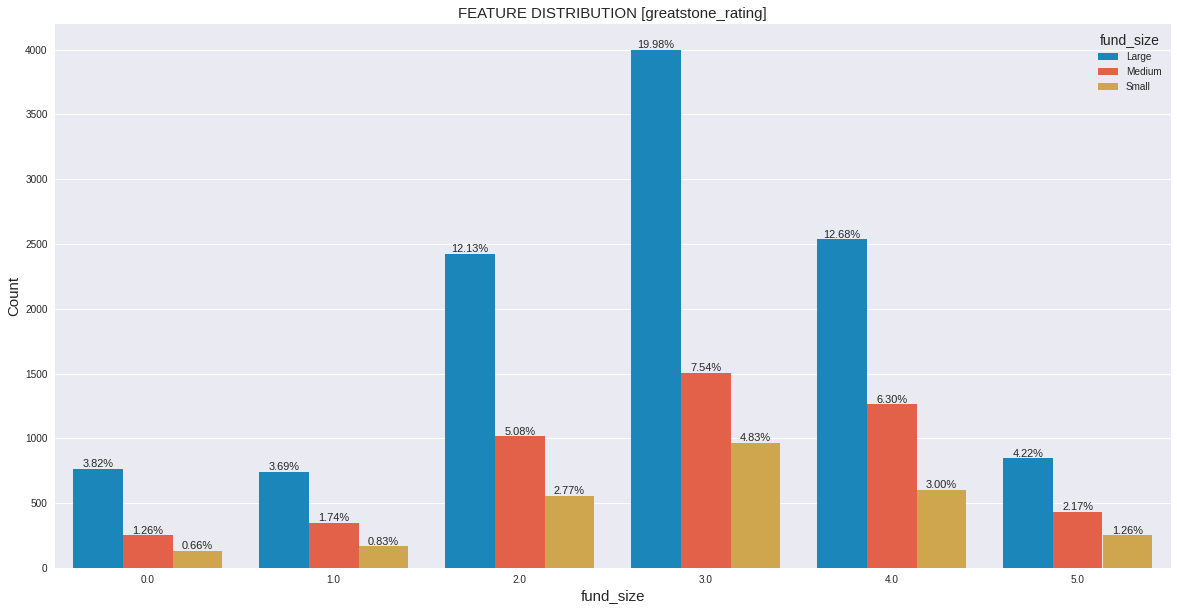

In [19]:
plt.subplots(1,1,figsize=(20,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=data_joined[~data_joined.greatstone_rating.isnull()]['greatstone_rating'], data=data_joined[~data_joined.greatstone_rating.isnull()],hue='fund_size' )

g.set_title("FEATURE DISTRIBUTION [greatstone_rating]", fontsize = 15)
g.set_xlabel("fund_size", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data_joined[~data_joined.greatstone_rating.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

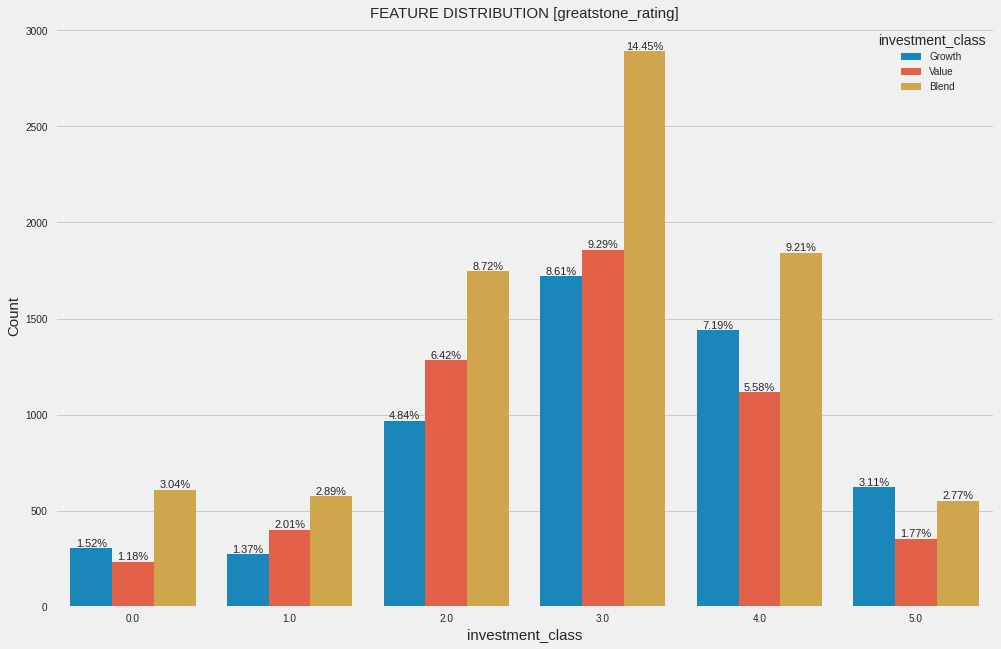

In [20]:
plt.subplots(1,1,figsize=(15,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=data_joined[~data_joined.greatstone_rating.isnull()]['greatstone_rating'], data=data_joined[~data_joined.greatstone_rating.isnull()],hue='investment_class' )

g.set_title("FEATURE DISTRIBUTION [greatstone_rating]", fontsize = 15)
g.set_xlabel("investment_class", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data_joined[~data_joined.greatstone_rating.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

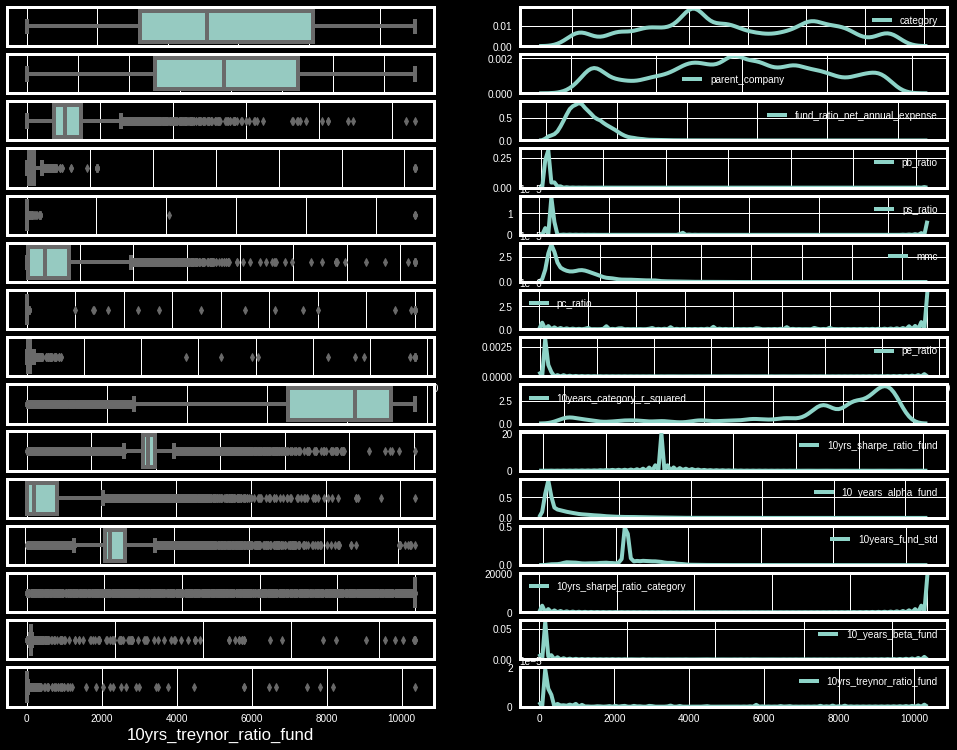

In [21]:
plt.style.use(['dark_background'])



## setting plot style 
#plt.style.use('fivethirtyeight') 

col_d = data[~data.greatstone_rating.isnull()].select_dtypes(exclude=['object']).columns[:15]
col=2
row = int(np.ceil(len(data[~data.greatstone_rating.isnull()].select_dtypes(exclude=['object']).columns[:15])))
fig, qaxis = plt.subplots(row,col,figsize=(15,12))

i=0
j=0
k=0

for i in range (len(col_d)):
  ## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  ax1= sns.boxplot(x=data[~data.greatstone_rating.isnull()][col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data[~data.greatstone_rating.isnull()][col_d[i]],ax = qaxis[j,k]) 
  k=k+1
  j=j
  if k==col:
    j=j+1
    k=0

In [0]:
from sklearn import preprocessing
from scipy.stats import zscore
mm_scaler = preprocessing.MinMaxScaler()    #  MinMaxScaler() #StandardScaler

In [23]:
data.isnull().sum().sum()

5000

In [24]:
data_scaled_train = pd.DataFrame(mm_scaler.fit_transform(data[~data.greatstone_rating.isnull()][col_int]),columns=col_int)
data_scaled_train

category  parent_company  fund_ratio_net_annual_expense  pb_ratio  \
0      0.381818        0.509211                       0.054511  0.042985   
1      0.381818        0.196053                       0.093045  0.043796   
2      0.390909        0.489474                       0.048872  0.018086   
3      0.818182        0.696053                       0.070489  0.016383   
4      0.118182        0.893421                       0.178571  0.000000   
...         ...             ...                            ...       ...   
40711  0.339091        0.376053                       0.082829  0.004015   
40712  0.563636        0.405263                       0.046898  0.000000   
40713  0.333273        0.626316                       0.063534  0.000925   
40714  0.288636        0.556579                       0.090912  0.012206   
40715  0.042909        0.514474                       0.126598  0.013025   

       ps_ratio       mmc  pc_ratio  pe_ratio  10years_category_r_squared  \
0      0.001217  0.198777  0.000798  0.011139                    0.907216   
1      0.001321  0.189189  0.000799  0.013729                    0.907216   
2      0.000587  0.118877  0.000447  0.007493                    0.927835   
3      0.000504  0.120200  0.000380  0.008696                    1.000000   
4      0.000000  0.000000  0.000000  0.000000                    0.855670   
...         ...       ...       ...       ...                         ...   
40711  0.000233  0.018098  0.000361  0.004649                    0.773196   
40712  0.000000  0.000000  0.000000  0.000000                    0.958763   
40713  0.000023  0.004408  0.000019  0.000468                    0.776701   
40714  0.001711  0.022360  0.000293  0.014472                    0.743299   
40715  0.000576  0.209614  0.000318  0.006271                    0.840619   

       10yrs_sharpe_ratio_fund  10_years_alpha_fund  10years_fund_std  \
0                     0.385382             0.006161          0.271154   
1                     0.405316             0.038506          0.240000   
2                     0.398671             0.028879          0.211731   
3                     0.311462             0.000121          0.215769   
4                     0.318937             0.025029          0.204615   
...                        ...                  ...               ...   
40711                 0.464452             0.066769          0.087308   
40712                 0.413289             0.029369          0.076731   
40713                 0.490698             0.079322          0.071308   
40714                 0.320066             0.140932          0.291154   
40715                 0.472425             0.096881          0.114808   

       10yrs_sharpe_ratio_category  10_years_beta_fund  \
0                              1.0            0.012264   
1                              1.0            0.010788   
2                              1.0            0.009539   
3                              1.0            0.010940   
4                              1.0            0.013854   
...                            ...                 ...   
40711                          1.0            0.013485   
40712                          1.0            0.011924   
40713                          1.0            0.011878   
40714                          1.0            0.010902   
40715                          1.0            0.010386   

       10yrs_treynor_ratio_fund  10_years_return_mean_annual_category  \
0                      0.001504                              0.500000   
1                      0.001602                              0.500000   
2                      0.001583                              0.500000   
3                      0.001557                              0.500000   
4                      0.000815                              0.500000   
...                         ...                                   ...   
40711                  0.000511                              0.141150   
40712      

In [25]:
print(data_scaled_train.shape)

(40716, 954)


In [26]:
data_scaled_train = pd.concat([data_scaled_train,data[~data.greatstone_rating.isnull()][col_tgt]],axis=1)
data_scaled_train.shape

(40716, 955)

In [27]:
data_scaled_train.isnull().sum().sum()

0

In [28]:
data_scaled_train[col_int[:30]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40716 entries, 0 to 40715
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   category                              40716 non-null  float64
 1   parent_company                        40716 non-null  float64
 2   fund_ratio_net_annual_expense         40716 non-null  float64
 3   pb_ratio                              40716 non-null  float64
 4   ps_ratio                              40716 non-null  float64
 5   mmc                                   40716 non-null  float64
 6   pc_ratio                              40716 non-null  float64
 7   pe_ratio                              40716 non-null  float64
 8   10years_category_r_squared            40716 non-null  float64
 9   10yrs_sharpe_ratio_fund               40716 non-null  float64
 10  10_years_alpha_fund                   40716 non-null  float64
 11  10years_fund_st

In [29]:
reduce_mem_usage(data_scaled_train)

Memory usage of dataframe is 296.66 MB
Memory usage after optimization is: 74.17 MB
Decreased by 75.0%


category  parent_company  fund_ratio_net_annual_expense  pb_ratio  \
0      0.381836        0.509277                       0.054504  0.042999   
1      0.381836        0.196045                       0.093018  0.043793   
2      0.390869        0.489502                       0.048859  0.018082   
3      0.818359        0.696289                       0.070496  0.016388   
4      0.118164        0.893555                       0.178589  0.000000   
...         ...             ...                            ...       ...   
40711  0.339111        0.375977                       0.082825  0.004013   
40712  0.563477        0.405273                       0.046906  0.000000   
40713  0.333252        0.626465                       0.063538  0.000925   
40714  0.288574        0.556641                       0.090881  0.012207   
40715  0.042908        0.514648                       0.126587  0.013023   

       ps_ratio       mmc  pc_ratio  pe_ratio  10years_category_r_squared  \
0      0.001217  0.198730  0.000797  0.011139                    0.907227   
1      0.001321  0.189209  0.000799  0.013725                    0.907227   
2      0.000587  0.118896  0.000447  0.007492                    0.927734   
3      0.000504  0.120178  0.000380  0.008698                    1.000000   
4      0.000000  0.000000  0.000000  0.000000                    0.855469   
...         ...       ...       ...       ...                         ...   
40711  0.000233  0.018097  0.000360  0.004650                    0.773438   
40712  0.000000  0.000000  0.000000  0.000000                    0.958984   
40713  0.000023  0.004406  0.000019  0.000468                    0.776855   
40714  0.001711  0.022354  0.000293  0.014473                    0.743164   
40715  0.000576  0.209595  0.000318  0.006271                    0.840820   

       10yrs_sharpe_ratio_fund  10_years_alpha_fund  10years_fund_std  \
0                     0.385498             0.006161          0.271240   
1                     0.405273             0.038513          0.239990   
2                     0.398682             0.028885          0.211670   
3                     0.311523             0.000121          0.215820   
4                     0.318848             0.025024          0.204590   
...                        ...                  ...               ...   
40711                 0.464355             0.066772          0.087280   
40712                 0.413330             0.029373          0.076721   
40713                 0.490723             0.079346          0.071289   
40714                 0.320068             0.140991          0.291260   
40715                 0.472412             0.096863          0.114807   

       10yrs_sharpe_ratio_category  10_years_beta_fund  \
0                              1.0            0.012268   
1                              1.0            0.010788   
2                              1.0            0.009537   
3                              1.0            0.010941   
4                              1.0            0.013855   
...                            ...                 ...   
40711                          1.0            0.013489   
40712                          1.0            0.011925   
40713                          1.0            0.011879   
40714                          1.0            0.010902   
40715                          1.0            0.010384   

       10yrs_treynor_ratio_fund  10_years_return_mean_annual_category  \
0                      0.001504                              0.500000   
1                      0.001602                              0.500000   
2                      0.001582                              0.500000   
3                      0.001557                              0.500000   
4                      0.000815                              0.500000   
...                         ...                                   ...   
40711                  0.000511                              0.141113   
40712      

In [30]:
data_scaled_train[col_int[:30]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40716 entries, 0 to 40715
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   category                              40716 non-null  float16
 1   parent_company                        40716 non-null  float16
 2   fund_ratio_net_annual_expense         40716 non-null  float16
 3   pb_ratio                              40716 non-null  float16
 4   ps_ratio                              40716 non-null  float16
 5   mmc                                   40716 non-null  float16
 6   pc_ratio                              40716 non-null  float16
 7   pe_ratio                              40716 non-null  float16
 8   10years_category_r_squared            40716 non-null  float16
 9   10yrs_sharpe_ratio_fund               40716 non-null  float16
 10  10_years_alpha_fund                   40716 non-null  float16
 11  10years_fund_st

In [31]:
col_int = data_scaled_train.drop(columns=['greatstone_rating'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['tag','id','fund_id']
col_tgt = ['greatstone_rating']
col_cat = data_scaled_train.drop(columns=['greatstone_rating'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat))
print('col_int :- ',len(col_int),'| col_cat :-',len(col_cat),'| col_id :-',len(col_id),'| col_tgt :-',len(col_tgt))
print(col_cat)

958
col_int :-  954 | col_cat :- 0 | col_id :- 3 | col_tgt :- 1
Index([], dtype='object')


In [0]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Feature Importance -  FEATURE SELECTION OF INPUT VARIABLES WITH TARGET $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [0]:
kbest_col = 50

In [34]:
data_scaled_train.shape

(40716, 955)

In [35]:
data_scaled_train.isnull().sum().sum()

0

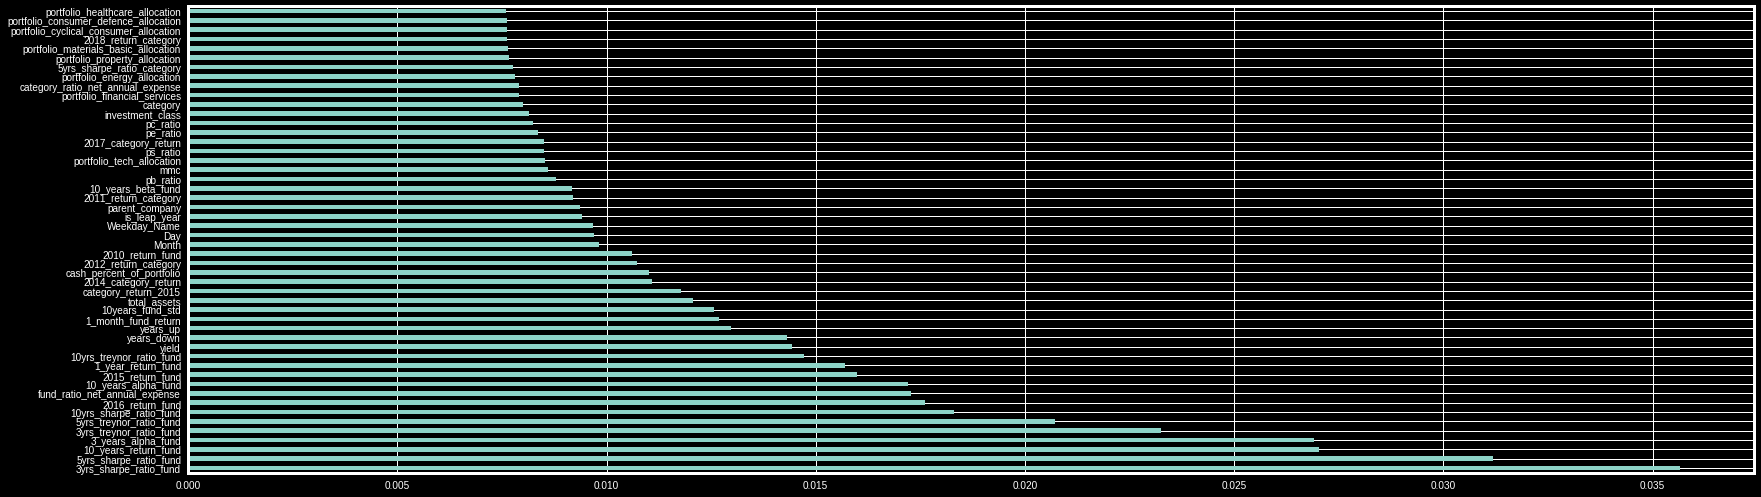

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
plt.figure(figsize=(25,8))
X =  data_scaled_train[col_int]
y =  data_scaled_train[col_tgt]
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=col_int)
feat_importances.nlargest(kbest_col).plot(kind='barh')
plt.show()

In [37]:
df_ns_df_sorted_FI = feat_importances.to_frame()
df_ns_df_sorted_FI.reset_index(inplace=True)
df_ns_df_sorted_FI.rename(columns={'index':'column',0:'score'},inplace=True)
df_ns_df_sorted_FI.sort_values(by='score',ascending=False,inplace=True)
df_ns_df_sorted_FI = df_ns_df_sorted_FI.head(kbest_col)
df_ns_df_sorted_FI

,column,score
45,3yrs_sharpe_ratio_fund,0.035643
50,5yrs_sharpe_ratio_fund,0.031175
17,10_years_return_fund,0.027035
44,3_years_alpha_fund,0.026915
43,3yrs_treynor_ratio_fund,0.023249
52,5yrs_treynor_ratio_fund,0.020726
9,10yrs_sharpe_ratio_fund,0.018307
69,2016_return_fund,0.017600
2,fund_ratio_net_annual_expense,0.017275
10,10_years_alpha_fund,0.017196


In [38]:
df_ns_df_sorted_FI.shape

(50, 2)

In [0]:
df_ns_df_sorted_FI.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/df_ns_df_sorted_FI.csv',index=False)

In [0]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ CHI2 -  FEATURE SELECTION OF INPUT VARIABLES WITH TARGET $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [41]:
# chi-squared (chi²) statistical test for non-negative features to select 10 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X =  data_scaled_train[col_int]
y =  data_scaled_train[col_tgt]
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=kbest_col)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['column','score']  #naming the dataframe columns
#print(featureScores.nlargest(25,'Score'))  #print 10 best features

#ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
df_ns_df_sorted_chi2 = pd.DataFrame(featureScores.nlargest(kbest_col,'score'))
df_ns_df_sorted_chi2

,column,score
17,10_years_return_fund,971.783122
89,category_6,857.950888
177,category_95,673.283741
84,is_leap_year,641.565381
952,investment_class_1,597.174306
60,cash_percent_of_portfolio,549.719987
81,is_month_end,532.135190
860,parent_company_669,522.022016
720,parent_company_529,484.072660
50,5yrs_sharpe_ratio_fund,459.058253


In [42]:
df_ns_df_sorted_chi2.shape

(50, 2)

In [0]:
df_ns_df_sorted_chi2.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/df_ns_df_sorted_chi2.csv',index=False)

In [0]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ ANNOVA -   FEATURE SELECTION OF INPUT VARIABLES WITH TARGET $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [45]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X =  data_scaled_train[col_int]
y =  data_scaled_train[col_tgt]
# define feature selection
selector = SelectKBest(score_func=f_classif, k=kbest_col)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['column', 'score'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['score', 'column'], ascending = [False, True])
df_ns_df_sorted_annova = pd.DataFrame(ns_df_sorted)
df_ns_df_sorted_annova

,column,score
16,5yrs_sharpe_ratio_fund,3129.161301
15,3yrs_sharpe_ratio_fund,2702.547403
5,10yrs_sharpe_ratio_fund,1775.903228
8,10_years_return_fund,1451.508134
1,fund_ratio_net_annual_expense,1361.208420
14,3_years_alpha_fund,1115.735549
20,years_down,570.329582
17,years_up,504.522273
18,cash_percent_of_portfolio,499.823690
6,10_years_alpha_fund,498.918630


In [46]:
df_ns_df_sorted_annova.shape

(50, 2)

In [0]:
df_ns_df_sorted_annova.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/df_ns_df_sorted_annova.csv',index=False)

In [0]:
############################################################################################################################################################################

In [49]:
best_columns = pd.DataFrame(df_ns_df_sorted_FI['column'].values,columns = ['FI'])
best_columns['CHI2'] = df_ns_df_sorted_chi2['column'].values
best_columns['ANNOVA'] = df_ns_df_sorted_annova['column'].values
best_columns.sort_values(by=['FI','CHI2','ANNOVA'],ascending=False,inplace=True)
best_columns.shape

(50, 3)

In [50]:
best_columns

,FI,CHI2,ANNOVA
13,yield,category_102,10yrs_sharpe_ratio_category
15,years_up,3_years_alpha_fund,total_assets
14,years_down,category_75,is_leap_year
18,total_assets,parent_company_316,is_month_end
34,ps_ratio,parent_company_623,parent_company_372
33,portfolio_tech_allocation,parent_company_387,2010_return_fund
44,portfolio_property_allocation,category_17,category_99
45,portfolio_materials_basic_allocation,parent_company_556,category_43
49,portfolio_healthcare_allocation,parent_company_54,parent_company_56
40,portfolio_financial_services,parent_company_112,parent_company_136


In [0]:
best_columns.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/best_columns.csv',index=False)

In [0]:
############################## PRINCIPAL COMPONENT ANALYSIS ##########################################

In [53]:
data_scaled_train.shape

(40716, 955)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [55]:
finalDf_pca = pd.concat([principalDf, data_scaled_train[col_tgt]], axis = 1)
finalDf_pca.head(4)

,principal component 1,principal component 2,greatstone_rating
0,-0.527850,-1.235906,3.0
1,-1.553204,-1.203511,4.0
2,-0.498978,-0.732655,3.0
3,2.550967,-0.729629,0.0


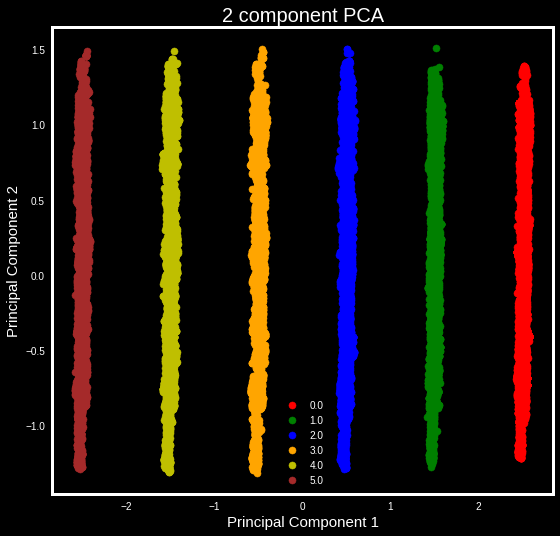

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique( finalDf_pca[col_tgt])
colors = ['r', 'g', 'b','orange','y','brown']


for target, color in zip(targets,colors):
    indicesToKeep = finalDf_pca['greatstone_rating'] == target
    
    ax.scatter(finalDf_pca.loc[indicesToKeep, 'principal component 1']
               , finalDf_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [62]:
pca.explained_variance_ratio_

array([0.39840534, 0.05911444])

In [0]:
finalDf_pca.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/finalDf_pca.csv',index=False)

In [0]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [0]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# load the iris datasets
X =  data_scaled_train[col_int]
y = data_scaled_train[col_tgt]
# create a base classifier used to evaluate a subset of attributes
model = RandomForestClassifier()
# create the RFE model and select 3 attributes
rfe = RFE(model, kbest_col)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-11 08:46:08.883742+05:30


2020-05-11 05:35:52.330723+05:30


In [0]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ RFE[Recursive Feature Elimination] - FEATURE SELECTION OF INPUT VARIABLES WITH TARGET $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X =  data_scaled_train[col_int]
target = data_scaled_train[col_tgt]

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)


import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')unra
your_now = now.astimezone(tz)
print (your_now)

In [0]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [0]:
plt.figure(figsize=(14, 6))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=5)
plt.xlabel('Number of features selected', fontsize=14, labelpad=5)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=5)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [0]:
## which features are considered to be least important and drop them

print(np.where(rfecv.support_ == False)[0])

# X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [0]:
print(np.where(rfecv.support_ == True)[0])

In [0]:
 X.columns.shape

In [0]:
col_name = []
all_columns = data_scaled_minmax[col_int].columns
for i in np.where(rfecv.support_ == True)[0]:
  col_name.append(all_columns[i])

In [0]:
rfecv.estimator_.feature_importances_

In [0]:
df_ns_df_sorted_RFE = pd.DataFrame()
df_ns_df_sorted_RFE['column'] = col_name
df_ns_df_sorted_RFE['score'] = rfecv.estimator_.feature_importances_

In [0]:
df_ns_df_sorted_RFE =df_ns_df_sorted_RFE.sort_values(by='score',ascending=False).head(12)
df_ns_df_sorted_RFE

In [0]:
df_ns_df_sorted_RFE = df_ns_df_sorted_RFE.sort_values(by='score', ascending=False)
plt.figure(figsize=(25,5))

plt.barh(y=df_ns_df_sorted_RFE['column'], width=df_ns_df_sorted_RFE['score'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('score', fontsize=14, labelpad=20)
plt.show()

In [0]:
df_ns_df_sorted_RFE.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/df_ns_df_sorted_RFE.csv',index=False)

In [0]:
best_columns['RFE'] = df_ns_df_sorted_RFE['column'].values

In [0]:
best_columns.to_csv('/gdrive/My Drive/Hackathon/GREATLEARNING-APRIL/FeatureSelection/best_columns.csv',index=False)

In [0]:
#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&